# Part 2. Introduction to Genome Assembly

We want to give you a brief context of where the data comes from and why it is important to excecute the code in the following parts of this course.

## What is sequencing?
Obtaining the nucleotide (adenine, thymine, cytosine, and guanine) sequences of DNA molecules present in a sample. It is a fundamental technique in molecular biology and genomics, providing insights into the genetic information that controls biological processes.


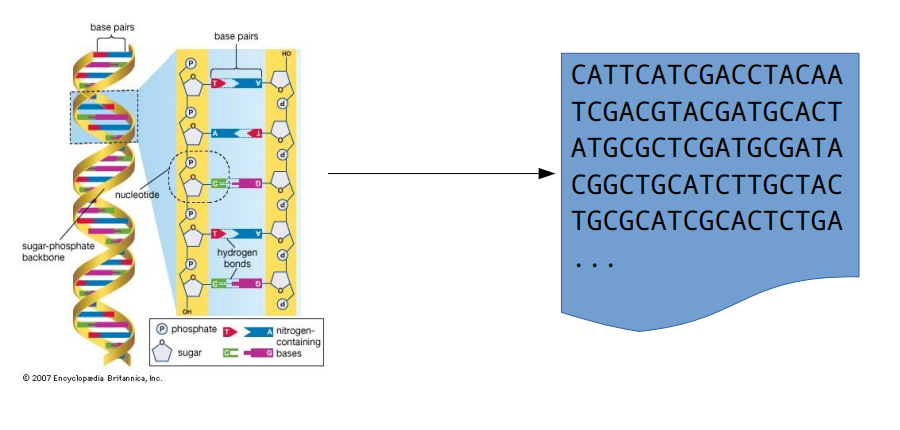

## What are the current secuencing technologies?
Currently, we have high throughput sequencing that generates a lot of data.
  

*   Illumina sequencing: is characterized by short but great quality reads producing up to 1Tbp per run.
*   PacBio and Nanopore are characterized by long reads (more than 10Kbp)
The cost of this sequences is more affordable everytime.
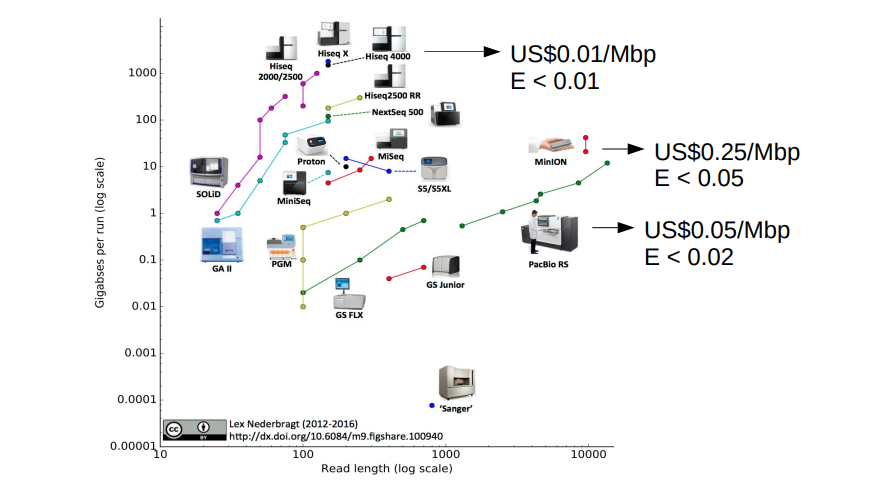



## What is genome assembly?
Obtain the sequences that best represent the generated reads by the sequencer. For example, with the following text in spanish that has a estimated sequence size of 50, a read size of 4,and 50 reads with a depth of 4x, what sentence do you think it represents?

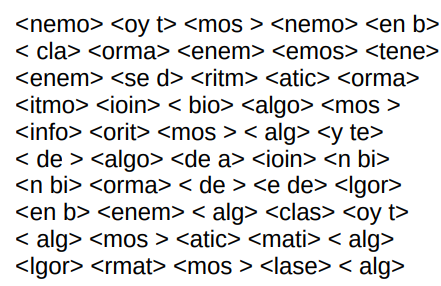

Maybe it will be easier with a bigger size or each reads and a higher depth, let's give it another try:
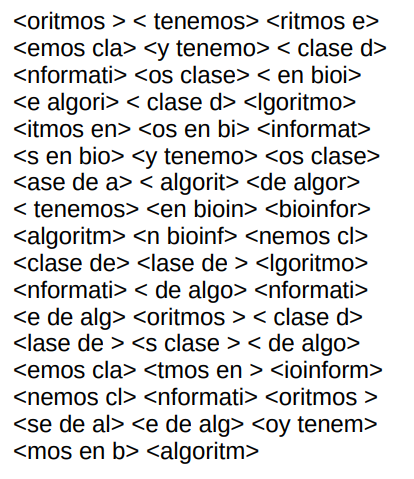

But if we get a example with DNA it gets harder, for the example sequence of AGGCAGCGTCGTACGTACGTACCGCTAGCTAATAACAGCGTACTTGCGT, the sequencing results with a read size of 8, 50 reads and a depth of 8 we would get something like this:



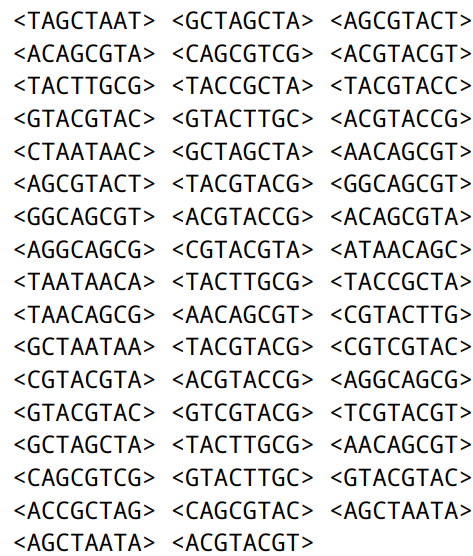

The algorithmic solution for so would be an **assembly graph**:


*   Directed graph
*   The reads became vertices
*   There is an edge between each pair of vertices if the reads are overlaping
*   The number of bases overlaping is the weight of the edge

Comming back to our previous example:
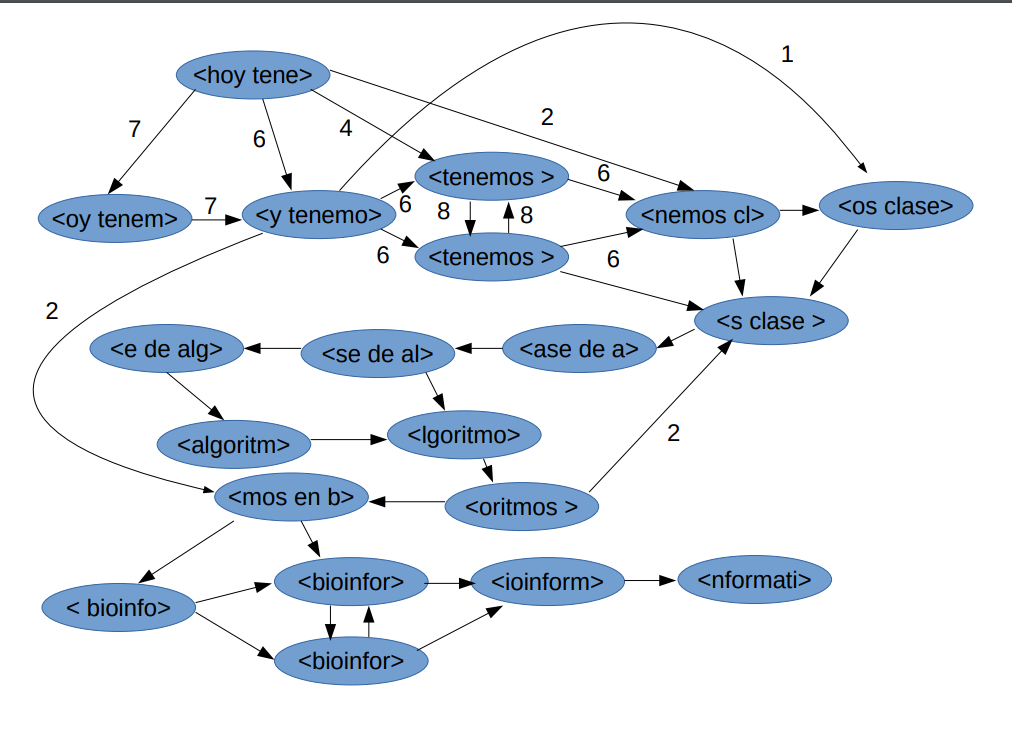




And if we remove redundances, we will get:
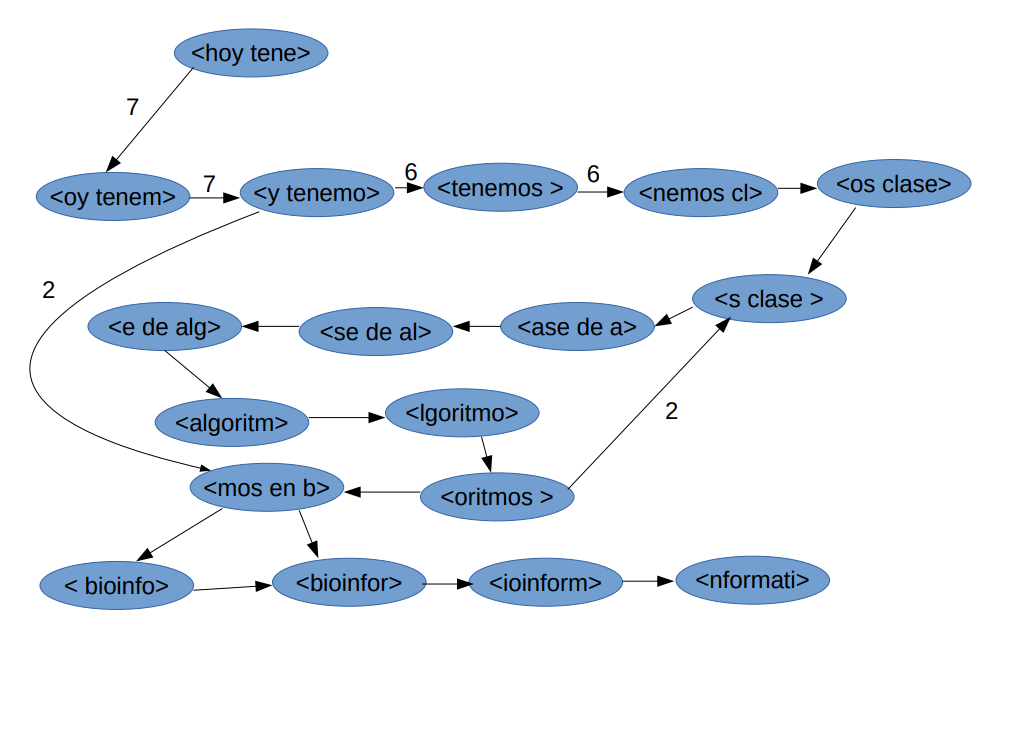

## Assembly process


1.   Overlap: Build the overlap graph that we exemplify in the previous steps.
2.   Layout: Find the path in the ovelap graph that explain the reads sequence.
3.   Consensus: Build the consensus sequence based on the aligned reads.

With DNA it has some "complications": the DNA has direction (5' to 3'), reads have errors and some of them are insertions or deletions.
The errror rate is higher in Nanopore data than in Illumina, maybe a 10% of error rate doesn't sounds like much but it is a lot when you see this image, where every purple line represents a change in the sequence:

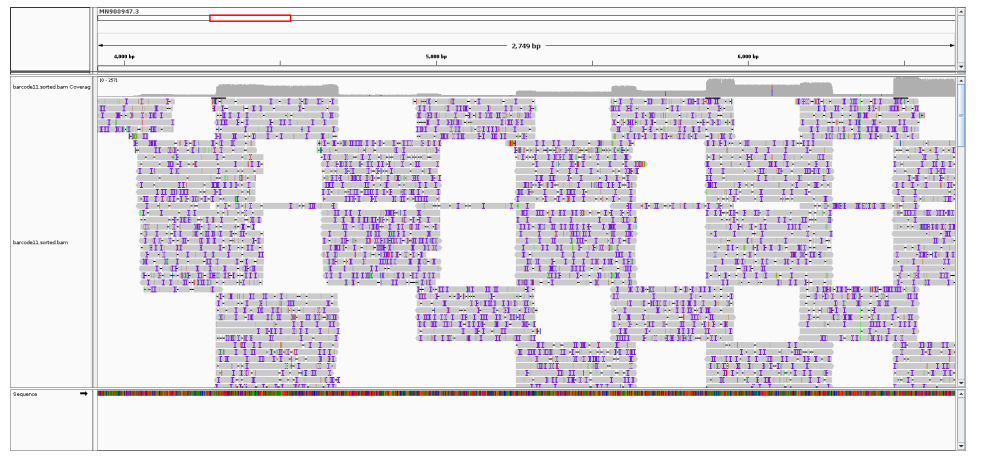




### K-mers
Are useful tool for many things but especially to correct the errors in the graph construction, a k-mer is define as a subsequence of k size.
In the absence of errors, the genome size can be infered by dividing the total amount of k-mers over the average depth, and dividing it again in 2   
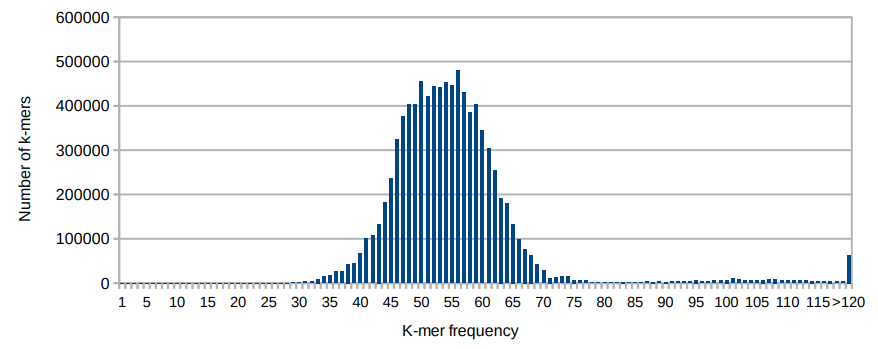

With a 1% a k-mer distribution will look like this:
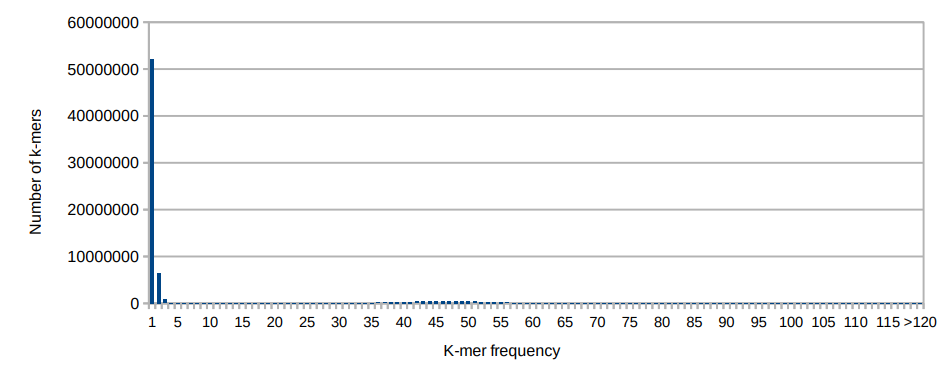

If we filter out those k-mers that appear just one time the graph changes to this:
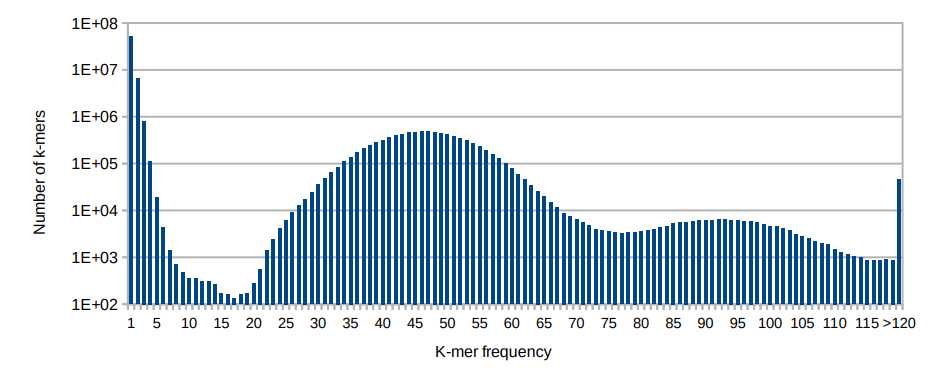

With a higher error rate, the distribution changes as follows:
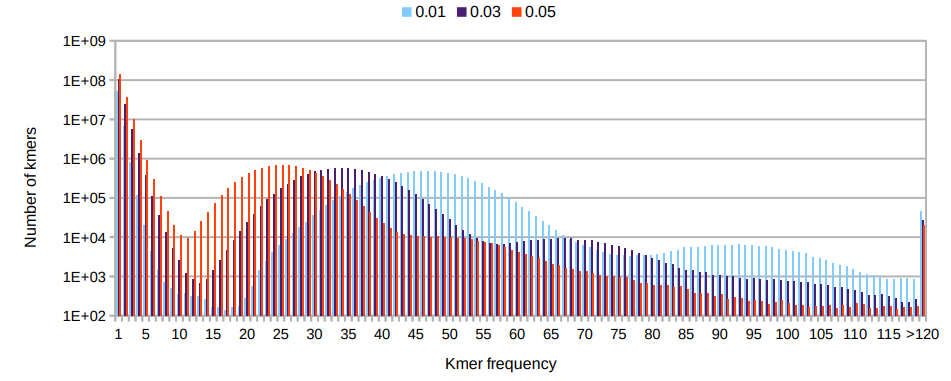

For a genome with a higher rate of repetitive regions, a second peak can be observed at twice the average depth
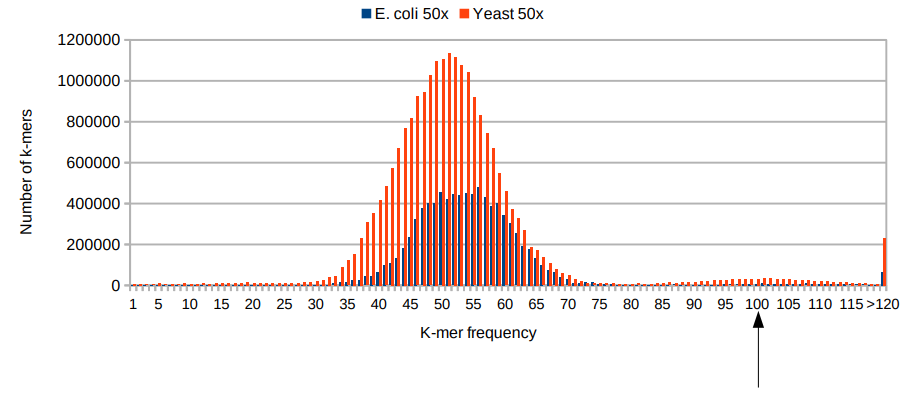

For a genome with a higher rate of repetitive regions, a second peak can be observed at twice the average depth.
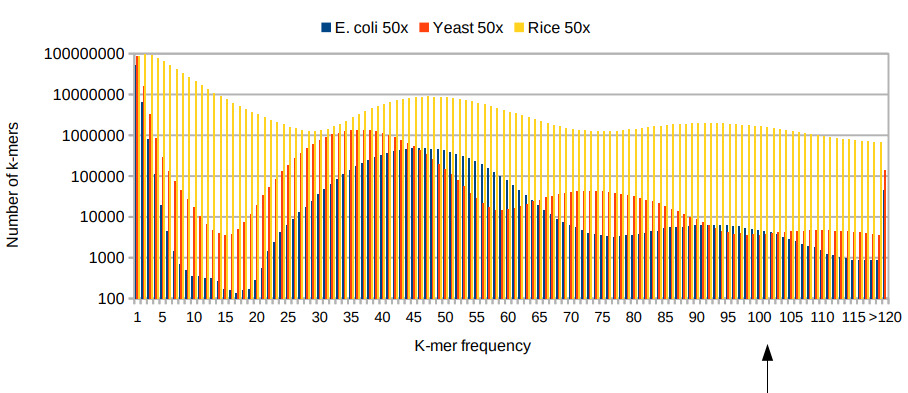

For a genome of a diploid individual, in the absence of
errors a peak can be observed at the middle of the coverage mode
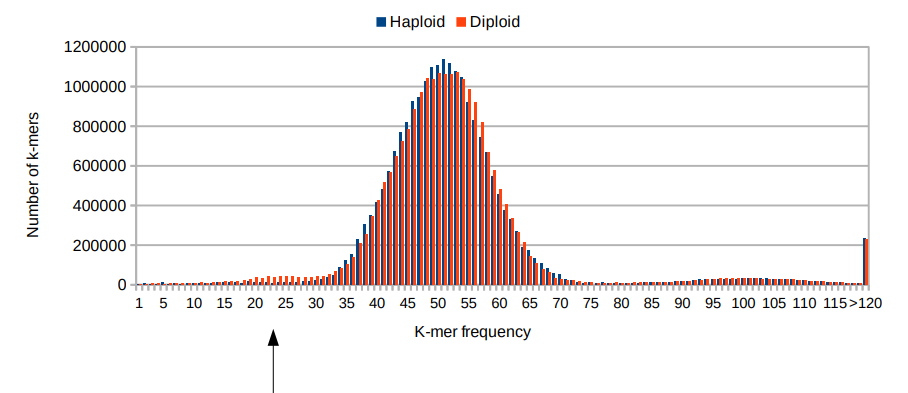

For a genome of a diploid individual, in the absence of
errors a peak can be observed at the middle of the coverage mode
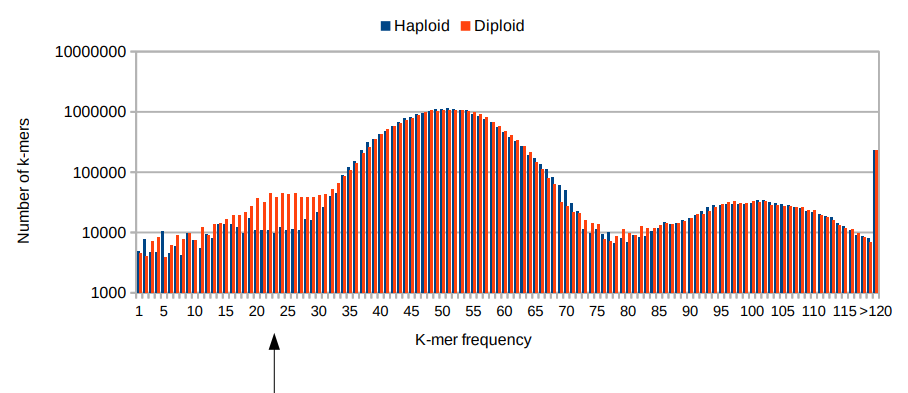

Even with a moderate error rate, some effect can be observed.
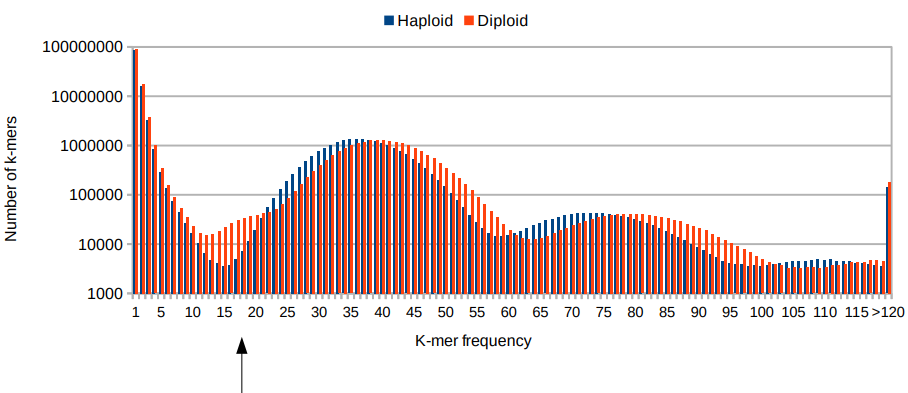

Reducing the average depth makes these effects no longer visible, especially in the presence of errors.
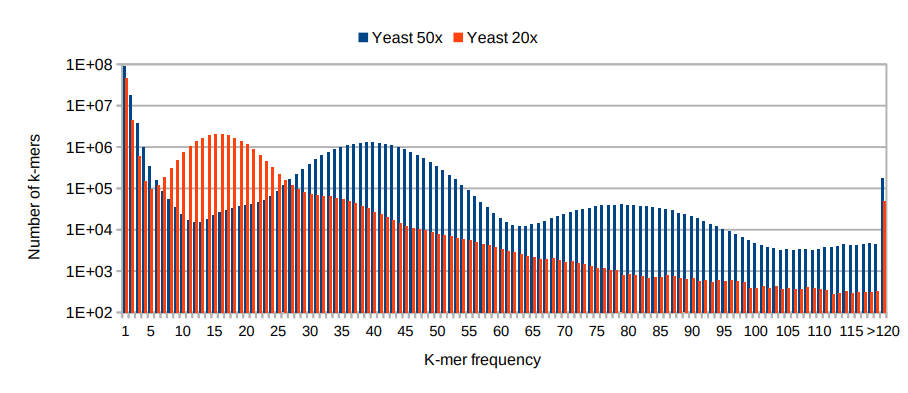

#### Error correction based on k-mers
Let's imagine that we have the folloring sequence and error - note that the G seems to be an error considering that it only appears in one read
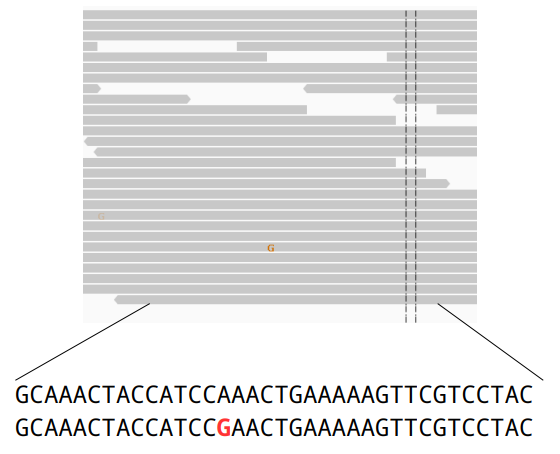

Now, we need to obtain all the distribution of all the k-mers, size k=11:


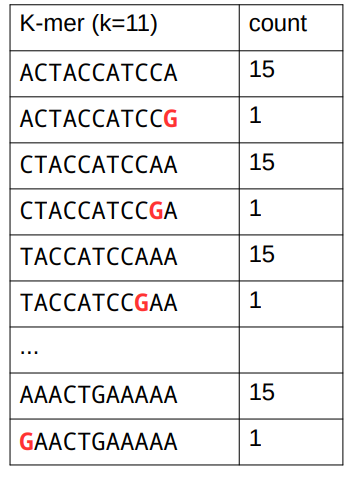

**Use of k-mers to identify overlaps**


Now that we already extracted every possible k-mer for all the sequences saving the read and start position, we have to:
1. Identify pairs of sequences that share
a number of k-mers greater than or equal to m.
2. Perform pairwise alignment to confirm overlap and identify edges


Challenge: Storing all k-mers with threir positions is very memory intensive

#### Minimizers
A minimizer is a K-mer with minimum hash value in the group of kmers that can be extracted from a window of size w. The minimizers of each sequence are saved along with their start position.

Example with k=15 y w=5
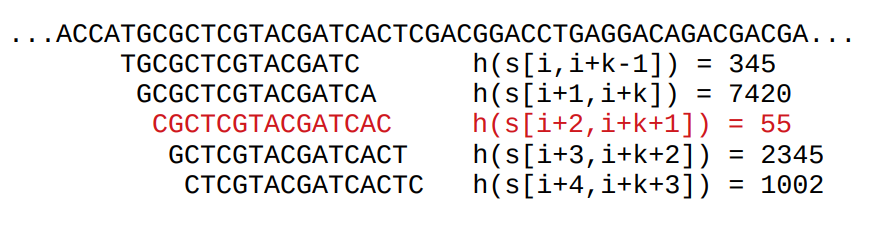

**Minimizers to identify overlaps**


* Minimizers are extracted from all sequences, saving the reading and start position for each minimizer

* Pairs of sequences that share a number of minimizers greater than or equal to m are identified

* Pairwise alignment is performed to confirm overlap and identify edges

#### NGSEP and its overlaps

**What is NGSEP?**


(Next Generation Sequencing Experience Platform)
NGSEP is an integrated framework for analysis of high throughput sequencing (HTS) reads. The current version of NGSEP includes functionalities for the following main tasks:
1. Genome assembly from long reads
2. Library-guided annotation of transposable elements in a genome assembly
3. Ortholog identification and alignment of annotated genome assemblies
4. Mapping of long and short reads.
5. Construction and downstream analysis of large datasets of genomic variation from reads aligned to a reference genome.
6. De-novo analysis of Genotype-by-Sequencing reads which supports single-end and paired end GBS and ddRAD-seq data.

For our latest news, follow us on Twitter: @NGSEP
It can be downloaded and excecuted in Mac, Windows and Linux at this [link](https://sourceforge.net/p/ngsep/wiki/Home/)

**How does the genome assembler works on NGSEP?**


The distribution of k-mer counts is first calculated, then hash values of each k-mer is calculated from the k-mer count with respect to the mode of the distribution

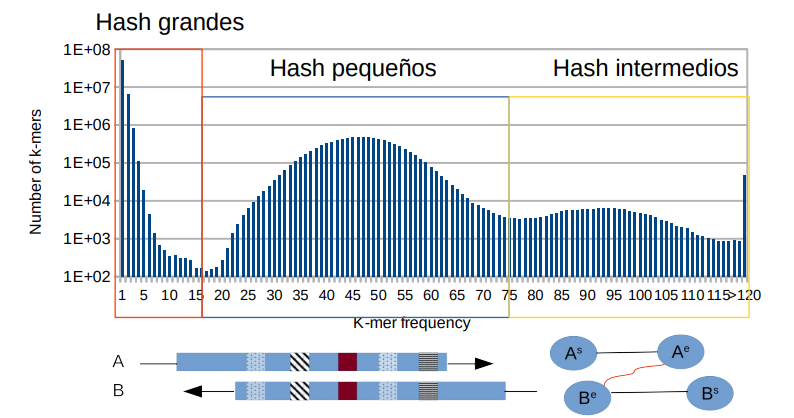

* “Safe” axes are selected that are best reciprocals in overlap and CSK
and the distributions of overlap, CSK, and proportion of evidence are calculated
* A Bayesian score is calculated for the remaining axes
* Axes are selected according to the score, so that a set of paths is always
preserved
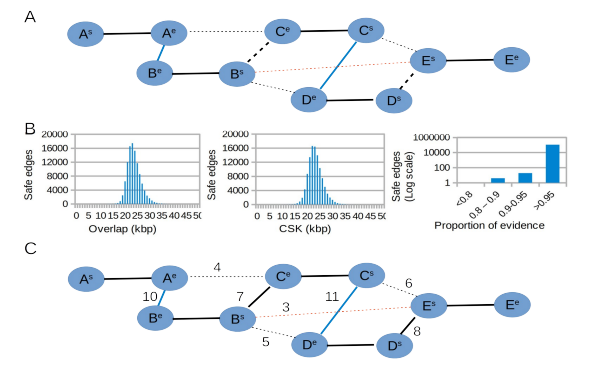


Reference: Gonzalez-Garcia LN, et al. 2023. New algorithms for accurate and efficient de novo genome assembly from long
DNA sequencing reads. Life Science Alliance in press. http://doi.org/10.26508/lsa.202201719


